In [1]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [46]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [307]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [220]:
# train_df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [47]:
train_df = train_df.drop(['Name','Cabin','PassengerId'],1)
test_df = test_df.drop(['Name','Cabin'],1)

In [48]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   P

In [49]:
# train_df["Embarked"].isnull().sum()
# train_df['Embarked'].value_counts()
train_df["Embarked"] = train_df["Embarked"].fillna('S')

In [50]:
test_df['Fare'].isnull().sum()
mean_fare = test_df['Fare'].mean()
test_df["Fare"] = test_df["Fare"].fillna(mean_fare)

In [51]:
datasets = [train_df, test_df]

for data in datasets:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = data["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["Age"] = age_slice
    data["Age"] = train_df["Age"].astype(int)
    


In [8]:
train_null = train_df["Age"].isnull().sum()
test_num = test_df['Age'].isnull().sum()
print(f'train: {train_null}\n test: {test_num}')

train: 0
 test: 0


/home/kizito/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kizito/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

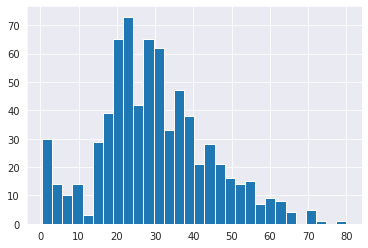

In [224]:
sns.set_style('darkgrid')
plt.hist(train_df['Age'],bins=30)

([<matplotlib.patches.Wedge at 0x7fc9b91649d0>,
 [Text(-0.4509447427781559, 1.0033189118922972, 'male'),
  Text(0.4509447427781556, -1.0033189118922972, 'female')])

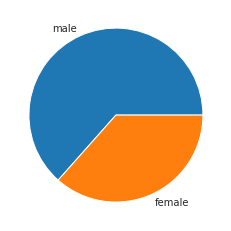

In [179]:
labels = df['Sex'].unique()
plt.pie(df['Sex'].value_counts(),labels=labels)

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [52]:
train_df.head()
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,22,0,0,330911,7.8292,Q
1,893,3,female,38,1,0,363272,7.0000,S
2,894,2,male,26,0,0,240276,9.6875,Q
3,895,3,male,35,0,0,315154,8.6625,S
4,896,3,female,35,1,1,3101298,12.2875,S


In [53]:
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Ticket'] = label_encoder.fit_transform(train_df['Ticket'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])

In [316]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [11]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [54]:
X = train_df.drop(['Survived'],1)
y = train_df['Survived']

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# y_train = sc.fit_transform(y_train).reshape(1,-1)
# X_test = sc.transform(X_test)

In [70]:
svc_clf = svm.SVC()
svc_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
svc_clf.score(X_train, y_train)


0.8426966292134831

In [17]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'C':[0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svm.SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.613, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.622, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.613, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.792, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.605, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.613, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.808, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.782, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.723, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.824, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.807, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................. C=100, gamma=0.0001, score=0.775, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.782, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.782, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.815, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.765, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.708, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.723, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [21]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
grid_accuracy = grid.score(X_train, y_train)
print(grid_accuracy)

0.8389261744966443


In [62]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(C= 0.01, penalty='l2')
lr_clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
lr_clf.score(X_train, y_train)

0.7986577181208053

In [66]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
logreg_cv.score(X_train, y_train)

/home/kizito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/kizito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/kizito/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/kizito/anacon

0.8053691275167785

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_clf.fit(X_train, y_train)

knn_clf.score(X_train, y_train)

0.8456375838926175

In [67]:
grid_params = {'n_neighbors':[3,5,11,19],
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid=grid_params,verbose=1,cv=3,n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_grid.score(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished


0.8473154362416108

In [333]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,22,0,0,7.8292,1
1,893,3,0,38,1,0,7.0000,2
2,894,2,1,26,0,0,9.6875,1
3,895,3,1,35,0,0,8.6625,2
4,896,3,0,35,1,1,12.2875,2


In [35]:
preds = test_df.drop(['PassengerId'],1)

In [36]:
preds = sc.fit_transform(preds)

In [37]:
prediction = knn_grid.predict(preds)

In [38]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

In [39]:
submission.to_csv('submission.csv', index=False)

In [44]:
subs = pd.read_csv('submission.csv')
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [45]:
subs.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
